In [8]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import openpiv
from openpiv import tools, process, validation, filters, scaling, pyprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from ipywidgets import interact_manual, interactive, fixed, IntSlider, HBox, VBox, Layout

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(30,20))
mpl.rc('image', cmap='gray')

In [2]:
import numpy as np
from numpy import ma

import pandas as pd
from pandas import DataFrame, Series  
import pims
import trackpy as tp

import cv2

import scipy
from scipy import signal

In [107]:
path='E:/Hard Drive Quincke Rotation/2019-01-30/100V-5min after.mov'

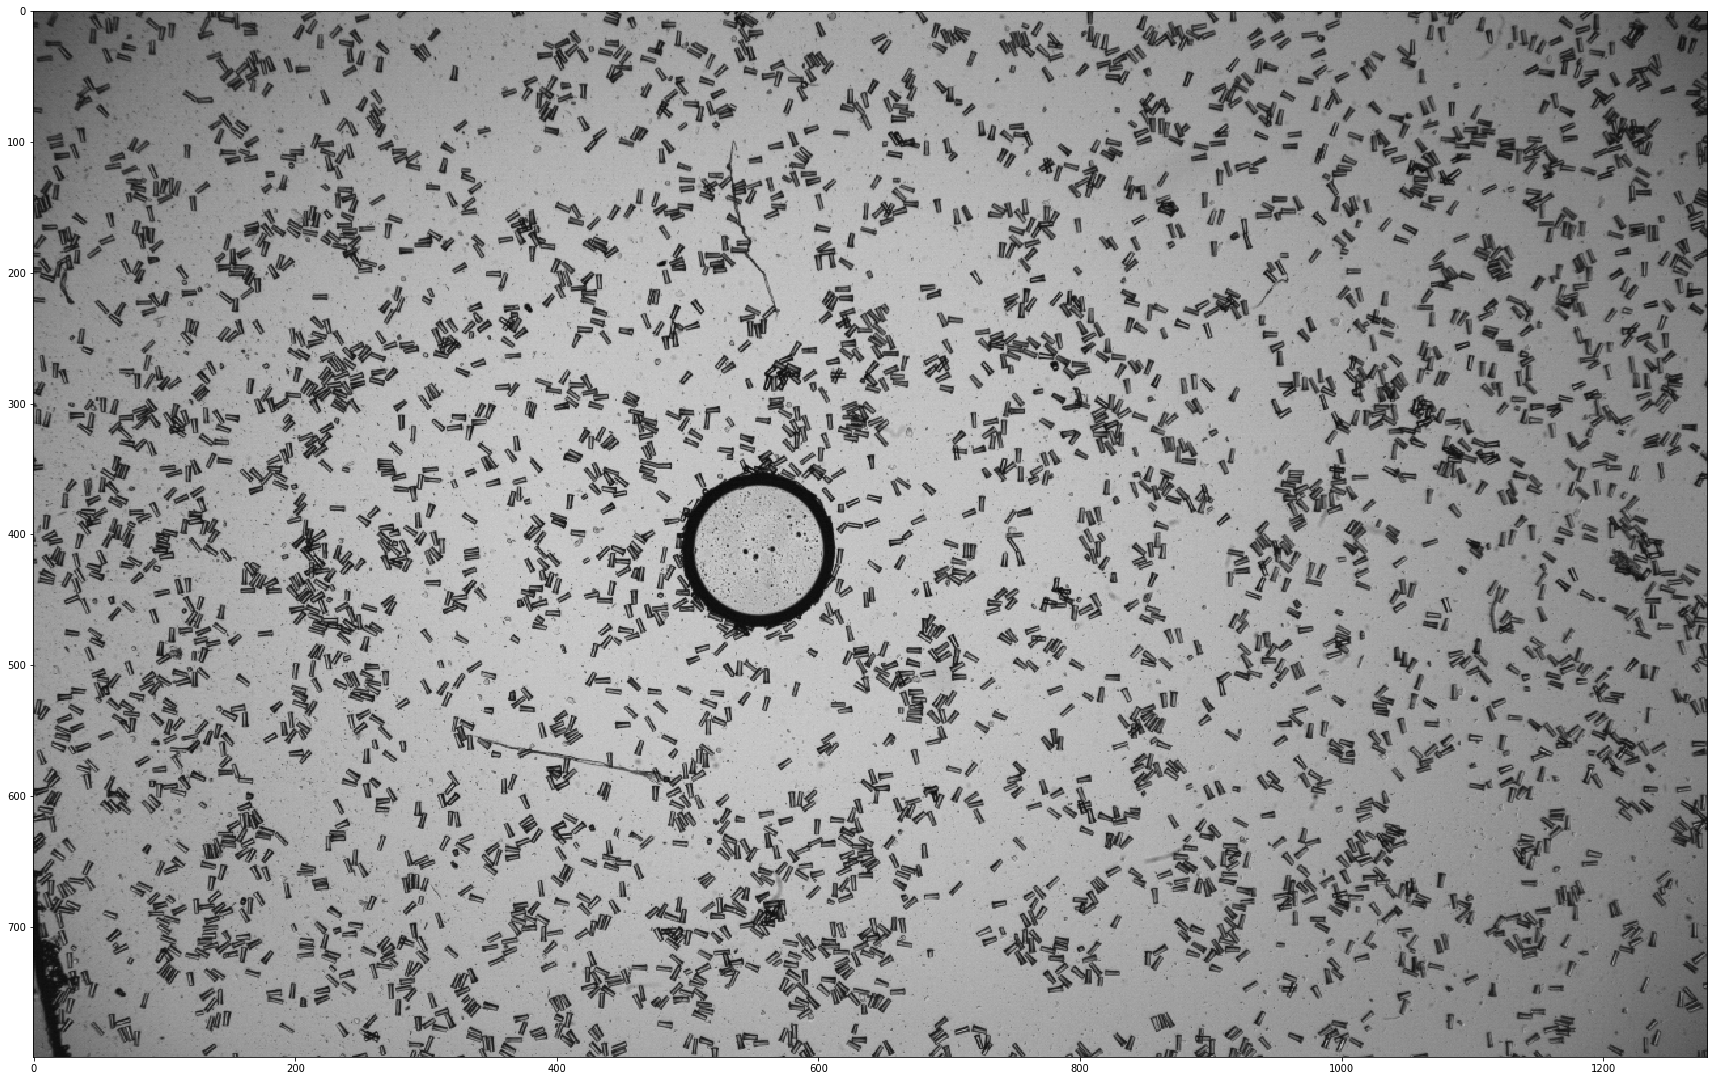

In [108]:
p = pims.Video(path)

plt.imshow(p[1])

In [109]:
length=len(p)-1
length

2710

In [110]:
leg=1000

In [111]:
zoom=2
fps=500

In [112]:
#gap=int(length/leg)
#gap

In [113]:
gap=1

In [114]:
p1=[]
p1=p[:][::gap]

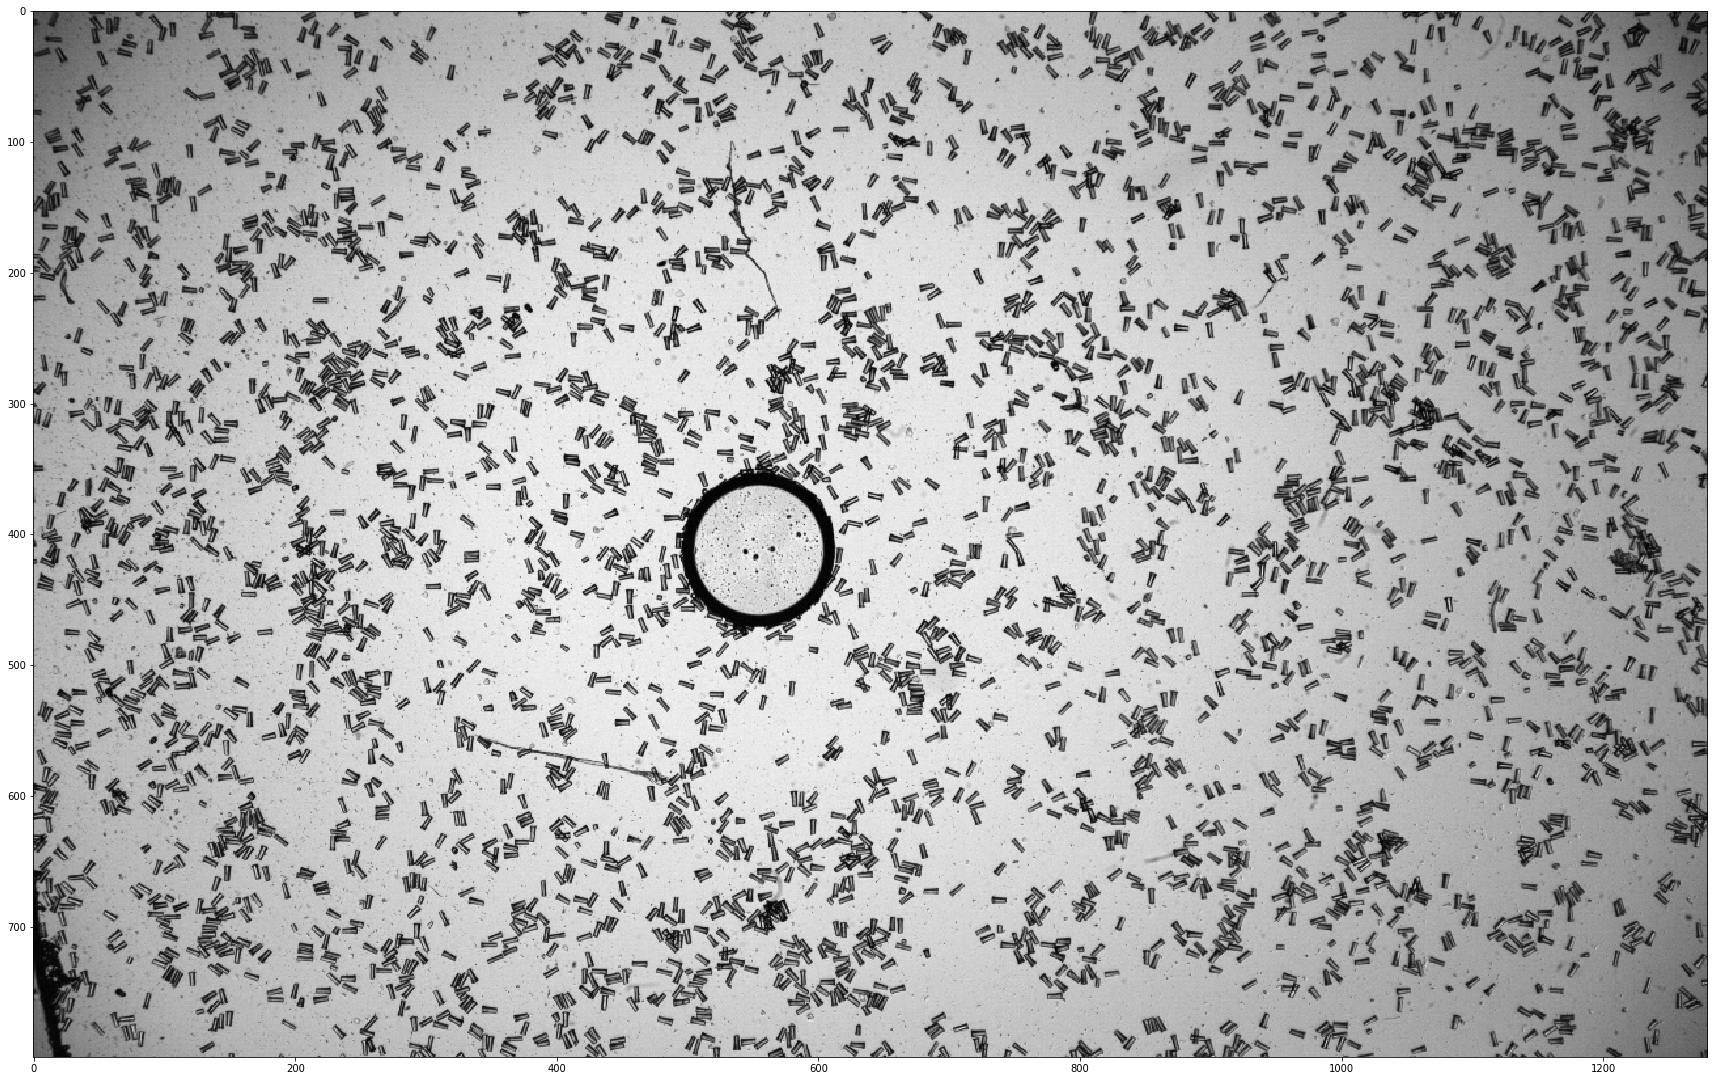

In [115]:
pp=[]

for i in range (leg):
    pp.append(p1[i][:,:,0])
    
plt.imshow(pp[11])

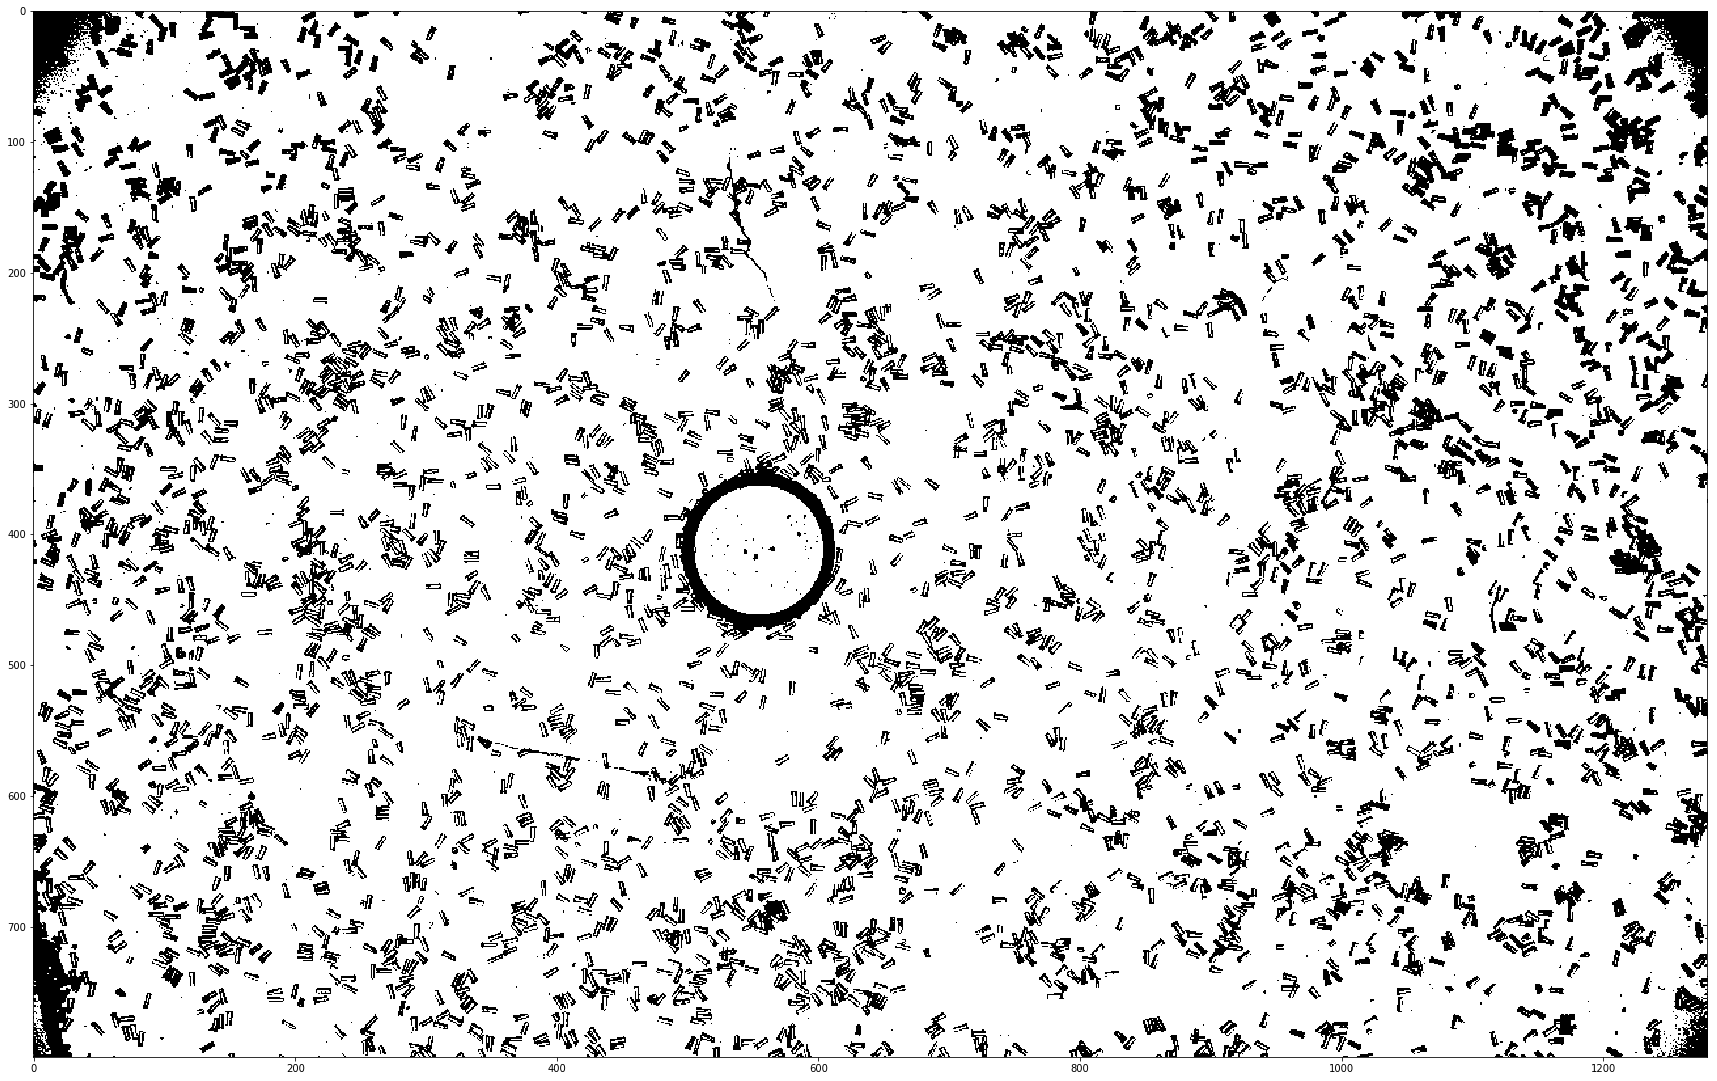

In [132]:
#et,pbinary= cv2.threshold(pp[0],150,255,cv2.THRESH_BINARY)
#pb=[pbinary]
pb=[]

for i in range (0,leg):
    et,pbinary= cv2.threshold(pp[i],95,255,cv2.THRESH_BINARY)
    pb.append(pbinary)

plt.imshow(pb[11])

In [133]:
#a=10
#b=11
#frame_a=pb[a]
#frame_b=pb[b]

In [134]:
#fig,ax = plt.subplots(1,2,figsize=(20,15))
#ax[0].imshow(frame_a,cmap=plt.cm.gray)
#ax[1].imshow(frame_b,cmap=plt.cm.gray)

In [135]:
#winsize = 12 # pixels
#searchsize = 15  # pixels, search in image B
#overlap = 3 # pixels

#hold=1.3

In [136]:
#u, v, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), 
#                                                     window_size=winsize, overlap=overlap, dt=(b-a)*gap/fps, 
#                                                     search_area_size=searchsize, sig2noise_method='peak2peak' )
#x, y = process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )
#u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = hold)
#u, v = filters.replace_outliers( u, v, method=str('localmean'), max_iter=10, kernel_size=2)
#x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = zoom*fps/gap )
#tools.save(x, y, u, v, mask, 'OpenPIV.txt' )
#tools.display_vector_field('OpenPIV.txt', scale=100, width=0.0025)

In [137]:
def happyname(a,b):
    return str(path+'  '+str(a)+'--'+str(b)+'.txt')

In [138]:
#happyname(2,3)

In [139]:
def happy(a,b,winsize,searchsize,overlap,hold,i):
    frame_a=pb[a]
    frame_b=pb[b]
    fig,ax = plt.subplots(1,2,figsize=(20,15))
    ax[0].imshow(frame_a,cmap=plt.cm.gray)
    ax[1].imshow(frame_b,cmap=plt.cm.gray)
    
    u, v, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), 
                                                     window_size=winsize, overlap=overlap, dt=(b-a)*gap/fps, 
                                                     search_area_size=searchsize, sig2noise_method='peak2peak' )

    x, y = process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )

    u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = hold)

    u, v = filters.replace_outliers( u, v, method=str('localmean'), max_iter=10, kernel_size=2)

    x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = zoom*fps/gap )

    tools.save(x, y, u, v, mask, i )

    tools.display_vector_field(i, scale=100, width=0.0025)

In [140]:
#OpenPIV=[]
    
#for i in range(0,5):
#    OpenPIV.append(str(i)+'.txt')

In [141]:
#str(OpenPIV[0])

In [142]:
#happy(11,12,  12,16,4,   2, happyname(11,12))

In [143]:
ini=30
lst=31

In [144]:
win = 12
sea = 16  
ove = 4
hod=0.1

C:\Users\51912\Anaconda3\envs\zzy\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


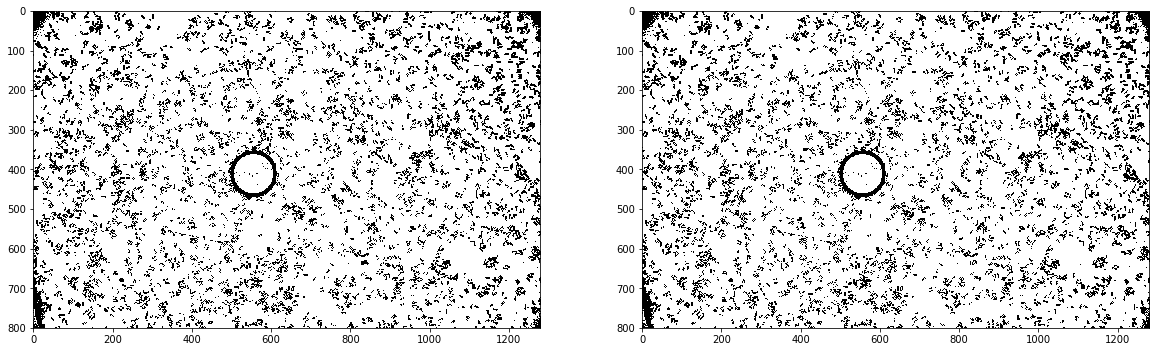

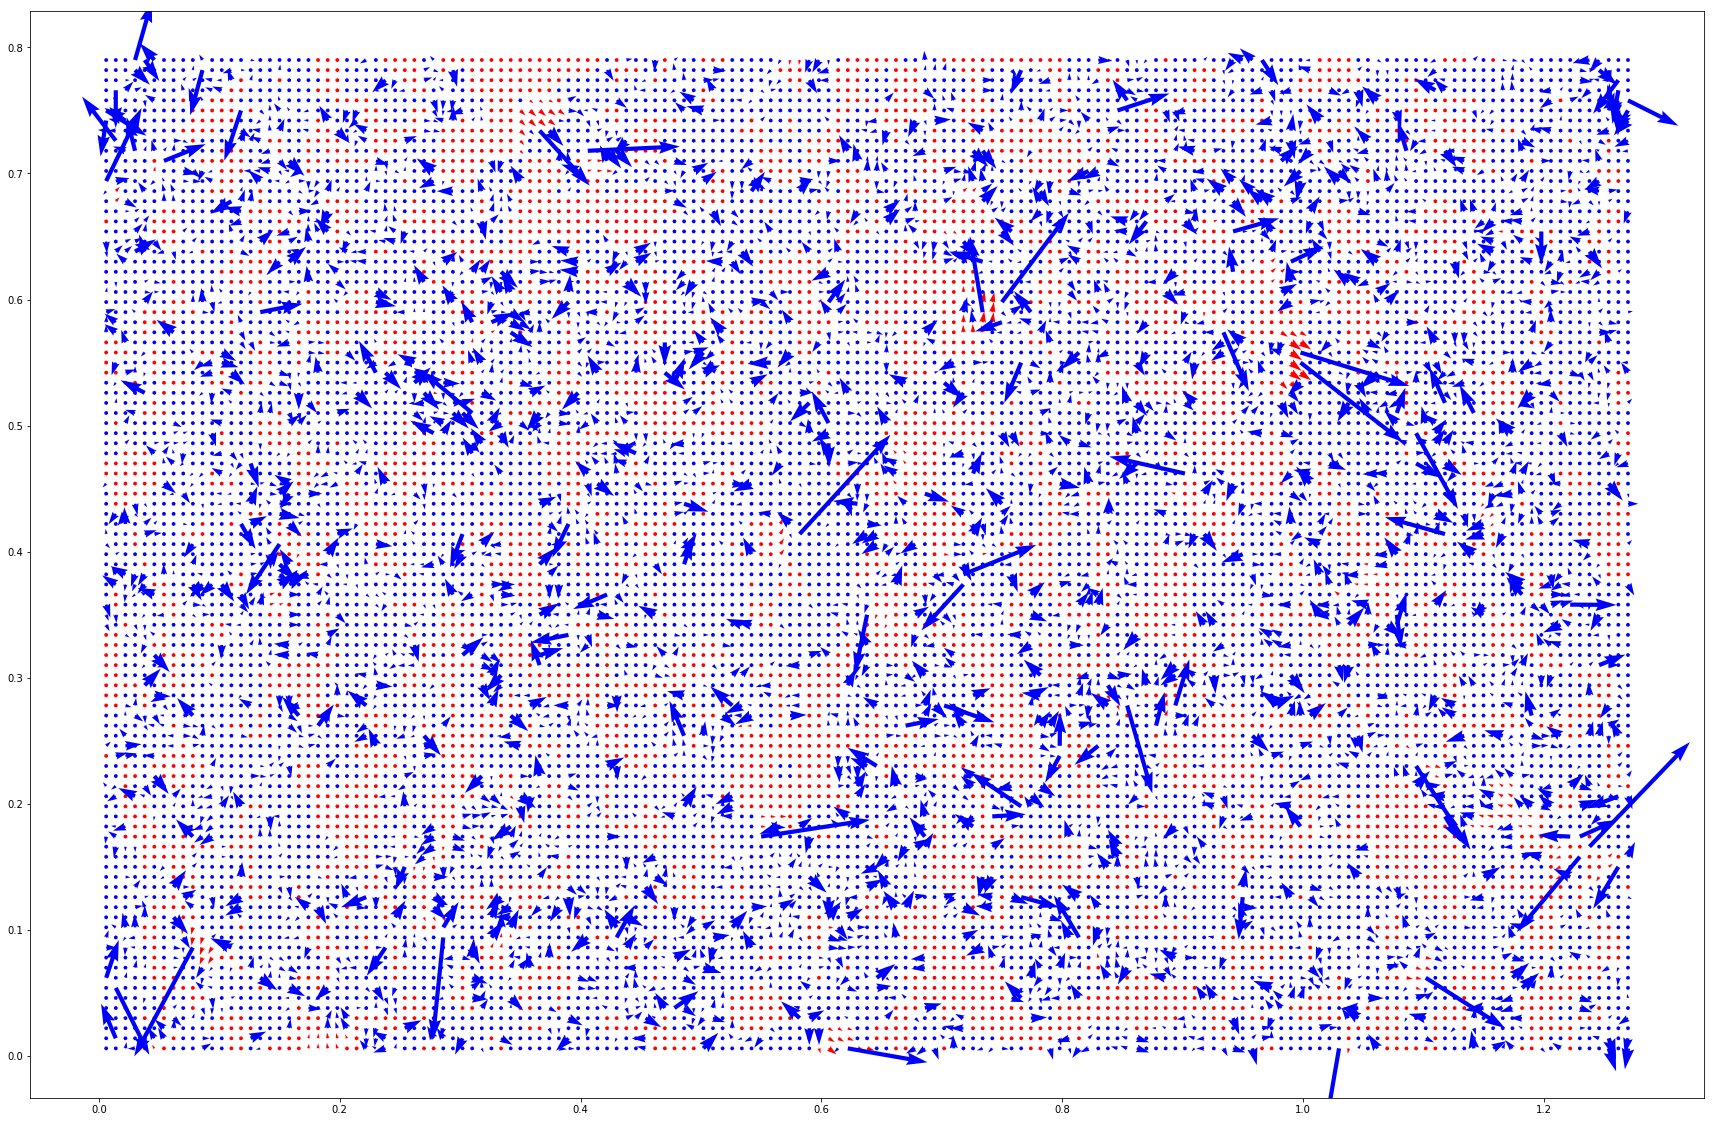

In [145]:
happy(ini,lst, win ,sea,ove,hod, happyname(ini,lst))